<div style="text-align: center; background-color: #8ABEB9; padding: 10px;">
    <h2 style="font-weight: bold;">AIR QUALITY RATINGS DATA ANALYSIS</h2>
</div>

## 1.Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style
%matplotlib inline
import seaborn as sns; sns.set()
plt.rcParams['figure.figsize']=[15,8]
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,  roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import scale
import warnings
warnings.filterwarnings('ignore')

## 2.Loading Dataset

In [ ]:
df = pd.read_csv('Airline Quality Ratings.csv')

## 3.Data Analysis

In [ ]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
df.tail()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,...,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,...,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,...,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,...,4,4,5,3,3,4,5,3,5,Satisfied
129879,129880,Female,20,Returning,Personal,Economy Plus,337,0,0.0,1,...,4,2,4,2,2,2,3,2,1,Neutral or Dissatisfied


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [ ]:
df.shape

(129880, 24)

### 3.1 Summary Statistics of numeric variables:

In [ ]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
ID,129880.0,64940.50,37493.27,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.43,15.12,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1190.32,997.45,31.0,414.00,844.0,1744.00,4983.0
Departure Delay,129880.0,14.71,38.07,0.0,0.00,0.0,12.00,1592.0
Arrival Delay,129487.0,15.09,38.47,0.0,0.00,0.0,13.00,1584.0
Departure and Arrival Time Convenience,129880.0,3.06,1.53,0.0,2.00,3.0,4.00,5.0
Ease of Online Booking,129880.0,2.76,1.40,0.0,2.00,3.0,4.00,5.0
Check-in Service,129880.0,3.31,1.27,0.0,3.00,3.0,4.00,5.0
Online Boarding,129880.0,3.25,1.35,0.0,2.00,3.0,4.00,5.0
Gate Location,129880.0,2.98,1.28,0.0,2.00,3.0,4.00,5.0


Dropping ID column as it is not a useful feature for model building.

Also we see that values of Flight Distance is much higher that other column values. So we will also standardise the values so that one column doesn't dominate the end result.

In [ ]:
df = df.drop(['ID'], axis=1)

In [ ]:
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
print('Numerical variables:', numerical_vars)
print('Categorical variables:', categorical_vars)

Numerical variables: ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay', 'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']
Categorical variables: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']


### 3.2 Missing Value

In [ ]:
missing_df =  df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len( df))*100,2)
missing_df

,Total No. of Missing Values,% of Missing Values
Gender,0,0.0
Age,0,0.0
Customer Type,0,0.0
Type of Travel,0,0.0
Class,0,0.0
Flight Distance,0,0.0
Departure Delay,0,0.0
Arrival Delay,393,0.3
Departure and Arrival Time Convenience,0,0.0
Ease of Online Booking,0,0.0


As Arrival Delay has missing values and it is a continuous variable, we will replace missing values with mean.

In [ ]:
df['Arrival Delay'].fillna(df['Arrival Delay'].mean(), inplace=True)

# Checking for missing values before imputation
missing_values = df['Arrival Delay'].isnull().sum()

# Rechecking for missing values after imputation
missing_values_after = df['Arrival Delay'].isnull().sum()

(missing_values, missing_values_after)

(0, 0)

In [ ]:
df.isnull().sum()  ## Checking if we have any NULL values

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

### 3.3 EDA

#### 3.3.1 Univariate Analysis

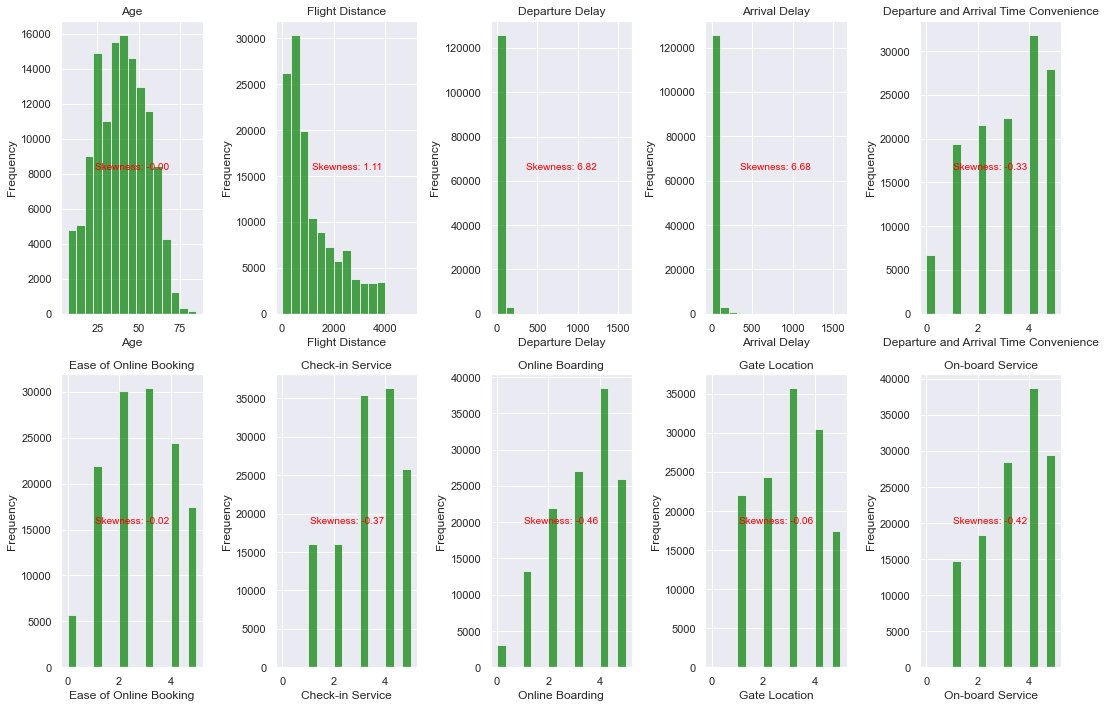

Skewness:
Age                                      -0.003606
Flight Distance                           1.108142
Departure Delay                           6.821980
Arrival Delay                             6.680239
Departure and Arrival Time Convenience   -0.332469
Ease of Online Booking                   -0.018779
Check-in Service                         -0.366569
Online Boarding                          -0.456911
Gate Location                            -0.058265
On-board Service                         -0.421320
Seat Comfort                             -0.485818
Leg Room Service                         -0.348414
Cleanliness                              -0.300926
Food and Drink                           -0.155063
In-flight Service                        -0.691580
In-flight Wifi Service                    0.040465
In-flight Entertainment                  -0.366385
Baggage Handling                         -0.677400
dtype: float64


In [ ]:
# Calculate skewness for numerical columns
skewness = df.select_dtypes(include=['int64', 'float64']).skew()

# Count the number of numerical columns
num_cols_count = len(df.select_dtypes(include=['int64', 'float64']).columns)

# Determine the layout for subplots
num_rows = 2 #(num_cols_count + 3) // 4   Adjust the number of columns in each row
num_cols = 5 #min(4, num_cols_count)  # Maximum of 4 columns in each row

# Plot histograms for numerical columns to visualize distributions and identify anomalies
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

for i in range(num_rows):
    for j in range(num_cols):
        col_idx = i * num_cols + j
        if col_idx < num_cols_count:
            col = df.select_dtypes(include=['int64', 'float64']).columns[col_idx]
            axes[i, j].hist(df[col], bins=15, color='green', alpha=0.7)
            axes[i, j].set_title(f'{col}')
            axes[i, j].set_xlabel(col)
            axes[i, j].set_ylabel('Frequency')

            # Compute skewness
            skew_val = skewness[col]

            # Plot skewness value in the center of plot
            axes[i, j].text(0.5, 0.5, f'Skewness: {skew_val:.2f}', horizontalalignment='center',
                            verticalalignment='center', transform=axes[i, j].transAxes, fontsize=10, color='red')

plt.tight_layout()
plt.show()

# Print skewness values
print("Skewness:")
print(skewness)

Flight Distance, Departure Delay and Arrival Delay are right skewed as skewness value is greater than 0.5.

In-flight Service and Baggage Handling are left skewed as skewness value is less than -0.5.

All other features have values between -0.5 and 0.5 which is within an acceptable range.

### Finding Outliers

In [ ]:
# Define the numerical columns
numerical_columns = [
    'Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay',
    'Departure and Arrival Time Convenience', 'Ease of Online Booking',
    'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service',
    'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink',
    'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment',
    'Baggage Handling'
]
#numerical_df = df[numerical_columns]

In [ ]:
numerical_df = df[numerical_columns]

# Calculate the interquartile range (IQR) for each numerical column
Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)
IQR = Q3 - Q1

df, numerical_df = df.align(numerical_df, axis=1, copy=False)
# Determine the threshold for outliers
outlier_threshold = 1.5
# Identify rows containing outliers in any numerical column
outliers = ((df < (Q1 - outlier_threshold * IQR)) | (df > (Q3 + outlier_threshold * IQR)))
# Count the number of outliers in each numerical column
outliers_count=outliers.sum()

print("Outliers count in each numerical columns:")
print(outliers_count)

Outliers count in each numerical columns:
Age                                           0
Arrival Delay                             17492
Baggage Handling                              0
Check-in Service                          16109
Class                                         0
Cleanliness                                   0
Customer Type                                 0
Departure Delay                           18098
Departure and Arrival Time Convenience        0
Ease of Online Booking                        0
Flight Distance                            2855
Food and Drink                                0
Gate Location                                 0
Gender                                        0
In-flight Entertainment                       0
In-flight Service                             0
In-flight Wifi Service                        0
Leg Room Service                              0
On-board Service                              0
Online Boarding                               

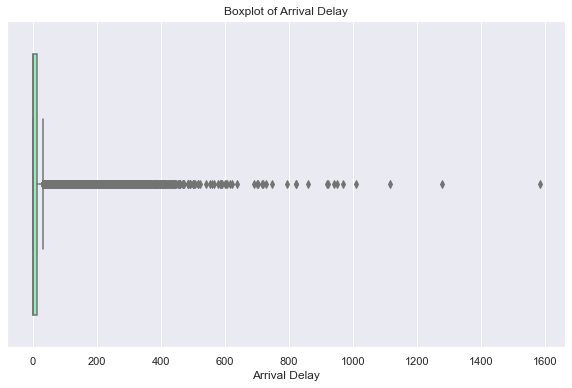

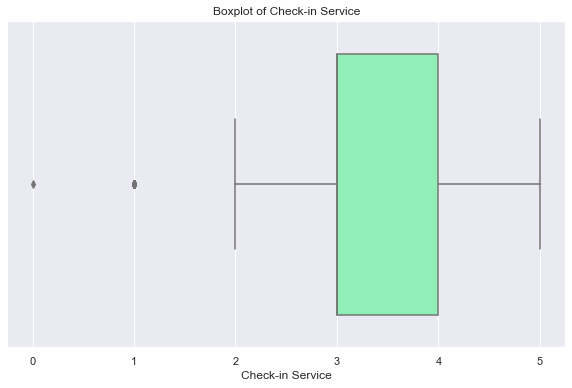

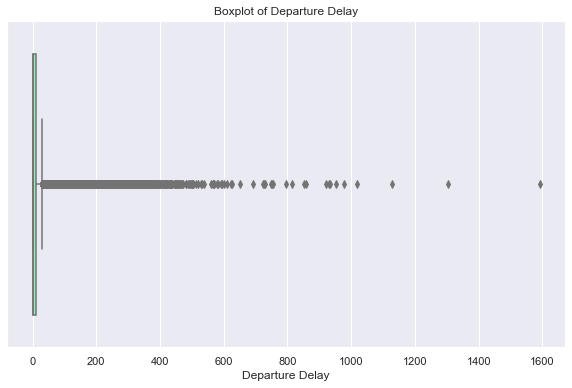

In [ ]:
lis=['Arrival Delay', 'Check-in Service', 'Departure Delay']

# Plotting boxplots for each numerical feature to identify outliers
for column in lis:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column],palette='rainbow')
    plt.title(f'Boxplot of {column}')
    plt.show()

We observe outliers in feature variables Arrival Delay, Check-in Service and Departure Delay respectively. But they are important in determining customer satisfaction and hence not removed.

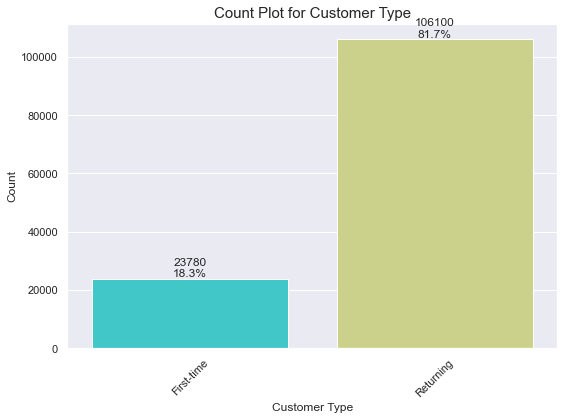

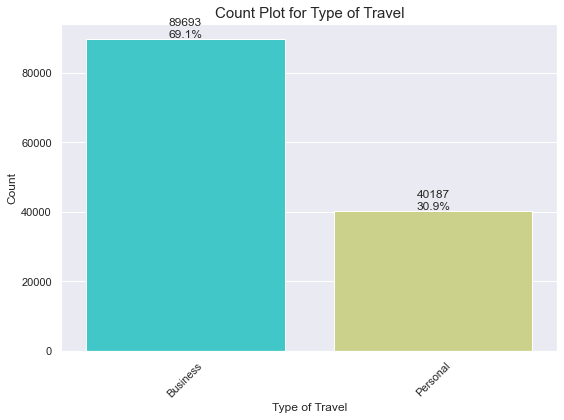

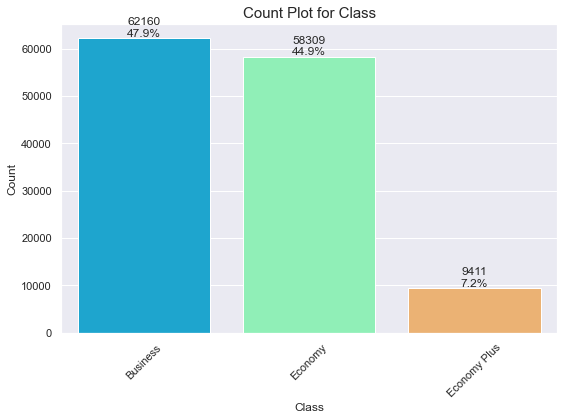

In [ ]:
# Explore categorical features
lis=['Customer Type', 'Type of Travel', 'Class']
for column in lis:
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=column, data=df,palette='rainbow')

    # Add count and percentage annotations to each bar
    total = len(df[column])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        count = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{count}\n{percentage}', (x, y), ha='center', va='bottom')

    plt.title(f'Count Plot for {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

#### 3.3.2 Multivariate Analysis

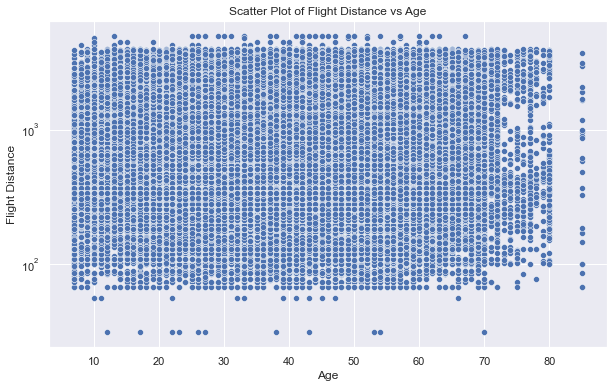

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Age', y='Flight Distance', data=df)
scatter.set_title('Scatter Plot of Flight Distance vs Age')
scatter.set_xlabel('Age')
scatter.set_ylabel('Flight Distance')
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.show()

No specific relation has been observed between Age and Flight Distance.

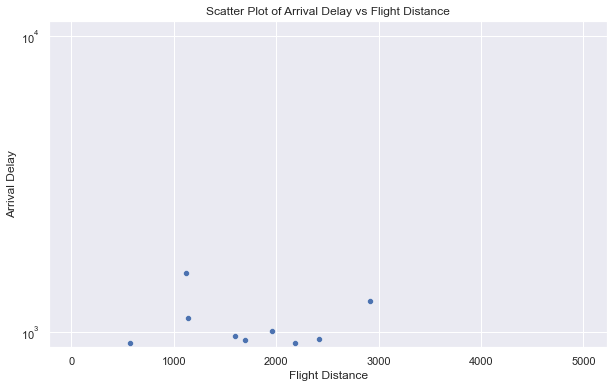

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Flight Distance', y='Arrival Delay', data=df)
scatter.set_title('Scatter Plot of Arrival Delay vs Flight Distance')
scatter.set_xlabel('Flight Distance')
scatter.set_ylabel('Arrival Delay')
plt.yscale('log')  # Set the y-axis scale to logarithmic
plt.show()

No specific relation has been observed between Flight Distance and Arrival Delay from Scatter Plots.

Text(0.5, 1.0, 'Correlation Matrix')

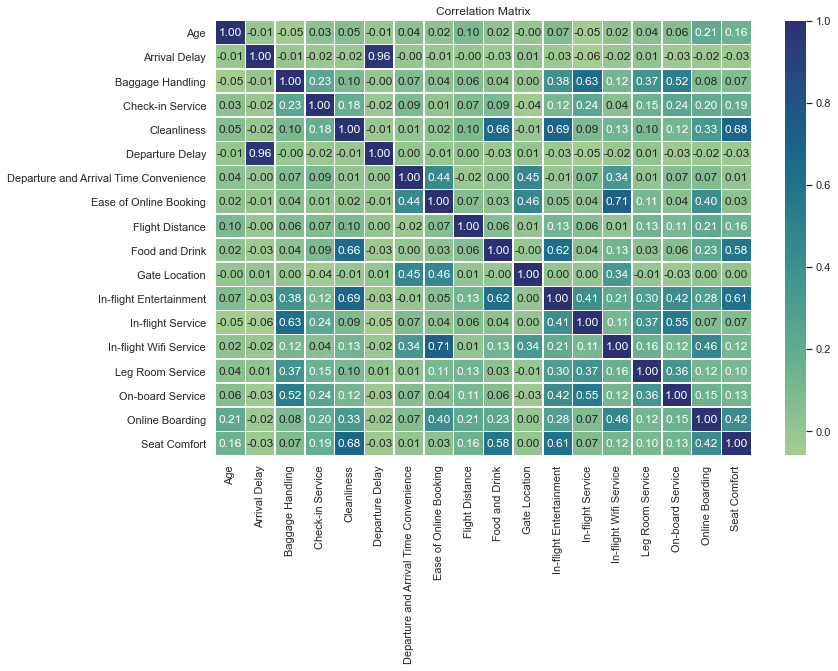

In [ ]:
# Correlation matrix

# Select only the numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')

We have a very high correlation between
1) Arrival Delay and Departure Delay
2) Seat Comfort and Cleanliness
3) Seat Comfort and In-Flight Entertainment

In [ ]:
df = df.drop(['Departure Delay'], axis=1)

In [ ]:
df = df.drop(['Seat Comfort'], axis=1)

In [ ]:
df.head()

,Age,Arrival Delay,Baggage Handling,Check-in Service,Class,Cleanliness,Customer Type,Departure and Arrival Time Convenience,Ease of Online Booking,Flight Distance,...,Gate Location,Gender,In-flight Entertainment,In-flight Service,In-flight Wifi Service,Leg Room Service,On-board Service,Online Boarding,Satisfaction,Type of Travel
0,48,5.0,5,4,Business,5,First-time,3,3,821,...,3,Male,5,5,3,2,3,3,Neutral or Dissatisfied,Business
1,35,39.0,5,3,Business,5,Returning,2,2,821,...,2,Female,5,5,2,5,5,5,Satisfied,Business
2,41,0.0,3,4,Business,5,Returning,4,4,853,...,4,Male,3,3,4,3,3,5,Satisfied,Business
3,50,0.0,5,3,Business,4,Returning,2,2,1905,...,2,Male,5,5,2,5,5,4,Satisfied,Business
4,49,1.0,3,3,Business,5,Returning,3,3,3470,...,3,Female,3,3,3,4,3,5,Satisfied,Business


## 4.Data Pre-processing

### 4.1 Label Encoding

Segregate Categorical and Numerical Columns

In [ ]:
catcol = []
numcol = []

for col in df.columns:
    if df[col].dtype == 'object':
        catcol.append(col)
    else:
        numcol.append(col)

In [ ]:
print("Categorical Columns:",catcol)
print("Numerical Columns:", numcol)

Categorical Columns: ['Class', 'Customer Type', 'Gender', 'Satisfaction', 'Type of Travel']
Numerical Columns: ['Age', 'Arrival Delay', 'Baggage Handling', 'Check-in Service', 'Cleanliness', 'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Flight Distance', 'Food and Drink', 'Gate Location', 'In-flight Entertainment', 'In-flight Service', 'In-flight Wifi Service', 'Leg Room Service', 'On-board Service', 'Online Boarding']


In [ ]:
encoder = LabelEncoder()

for col in catcol:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
df.head()

,Age,Arrival Delay,Baggage Handling,Check-in Service,Class,Cleanliness,Customer Type,Departure and Arrival Time Convenience,Ease of Online Booking,Flight Distance,...,Gate Location,Gender,In-flight Entertainment,In-flight Service,In-flight Wifi Service,Leg Room Service,On-board Service,Online Boarding,Satisfaction,Type of Travel
0,48,5.0,5,4,0,5,0,3,3,821,...,3,1,5,5,3,2,3,3,0,0
1,35,39.0,5,3,0,5,1,2,2,821,...,2,0,5,5,2,5,5,5,1,0
2,41,0.0,3,4,0,5,1,4,4,853,...,4,1,3,3,4,3,3,5,1,0
3,50,0.0,5,3,0,4,1,2,2,1905,...,2,1,5,5,2,5,5,4,1,0
4,49,1.0,3,3,0,5,1,3,3,3470,...,3,0,3,3,3,4,3,5,1,0


### 4.2 Data Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

for col in numcol:
    df[[col]] = scale.fit_transform(df[[col]])

In [ ]:
df.head()

,Age,Arrival Delay,Baggage Handling,Check-in Service,Class,Cleanliness,Customer Type,Departure and Arrival Time Convenience,Ease of Online Booking,Flight Distance,...,Gate Location,Gender,In-flight Entertainment,In-flight Service,In-flight Wifi Service,Leg Room Service,On-board Service,Online Boarding,Satisfaction,Type of Travel
0,0.525641,0.003157,1.0,0.8,0,1.0,0,0.6,0.6,0.159532,...,0.6,1,1.0,1.0,0.6,0.4,0.6,0.6,0,0
1,0.358974,0.024621,1.0,0.6,0,1.0,1,0.4,0.4,0.159532,...,0.4,0,1.0,1.0,0.4,1.0,1.0,1.0,1,0
2,0.435897,0.000000,0.5,0.8,0,1.0,1,0.8,0.8,0.165994,...,0.8,1,0.6,0.6,0.8,0.6,0.6,1.0,1,0
3,0.551282,0.000000,1.0,0.6,0,0.8,1,0.4,0.4,0.378433,...,0.4,1,1.0,1.0,0.4,1.0,1.0,0.8,1,0
4,0.538462,0.000631,0.5,0.6,0,1.0,1,0.6,0.6,0.694467,...,0.6,0,0.6,0.6,0.6,0.8,0.6,1.0,1,0


## 5.Model

In [ ]:
x = df.drop('Satisfaction',axis=1)
y = df['Satisfaction']

### 5.1 Train and Test split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.15,shuffle = True,random_state=42)

In [ ]:
# Print the shapes of the resulting sets
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (110398, 20) (110398,)
Testing set shape: (19482, 20) (19482,)


### 5.2 Model Building

In [ ]:
# Train a logistic regression model
logreg_model = LogisticRegression(C=0.1, solver='liblinear', random_state=42, max_iter=1000)
logreg_model.fit(x_train, y_train)

# Make predictions on training and test sets
train_predictions = logreg_model.predict(x_train)
test_predictions = logreg_model.predict(x_test)

In [ ]:
y_pred = logreg_model.predict(x_test)

In [ ]:
# Calculate accuracy on test sets
test_accuracy = accuracy_score(y_test, test_predictions)
logistic_test_accuracy = test_accuracy

print("Accuracy of Logistic Regression model on the test set:", test_accuracy)
print("{:.2%}".format(test_accuracy), "of the test instances were correctly classified.")

Accuracy of Logistic Regression model on the test set: 0.8724976901755467
87.25% of the test instances were correctly classified.


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("accuracy=", accuracy*100)
print("f1_score=", f1*100)
print("precision=", precision*100)
print("recall=", recall*100)

accuracy= 87.24976901755467
f1_score= 85.07928880345987
precision= 86.77858105624311
recall= 83.44526923530104


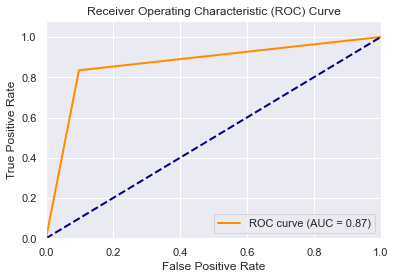

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.08])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

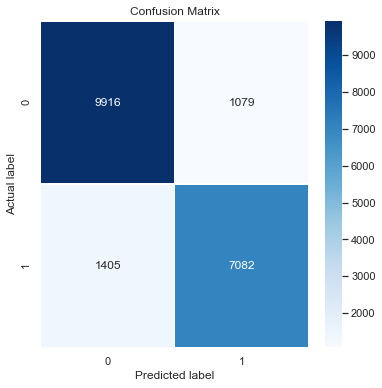

In [ ]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()